# Students Performance in Exams

#### Marks secured by the students in various subjects

Для начала импортируем необходимые библиотеки:

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import Markdown, display

Скачиваем датасет с данными о студентах

In [80]:
data = pd.read_csv('exams.csv')
print(data.shape)
data.tail(10)

(1000, 8)


gender race/ethnicity parental level of education         lunch  \
990    male        group D                some college      standard   
991  female        group C          associate's degree      standard   
992    male        group C                some college      standard   
993  female        group A          associate's degree      standard   
994    male        group E                 high school  free/reduced   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
990                    none          67             55             53  
991                    none          87             93             88  
992                    none          69             63             66  
993                    none          58             54             58  
994               completed          86             82             75  
995                    none          73             70             65  
996               completed          85             91             92  
997                    none          32             35             41  
998                    none          73             74             82  
999               completed          65             60             62

Смотрим на данные и на их распределение

In [81]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5)

for i,col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45) 
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

Теперь посмотрим на распределение баллов по предметам

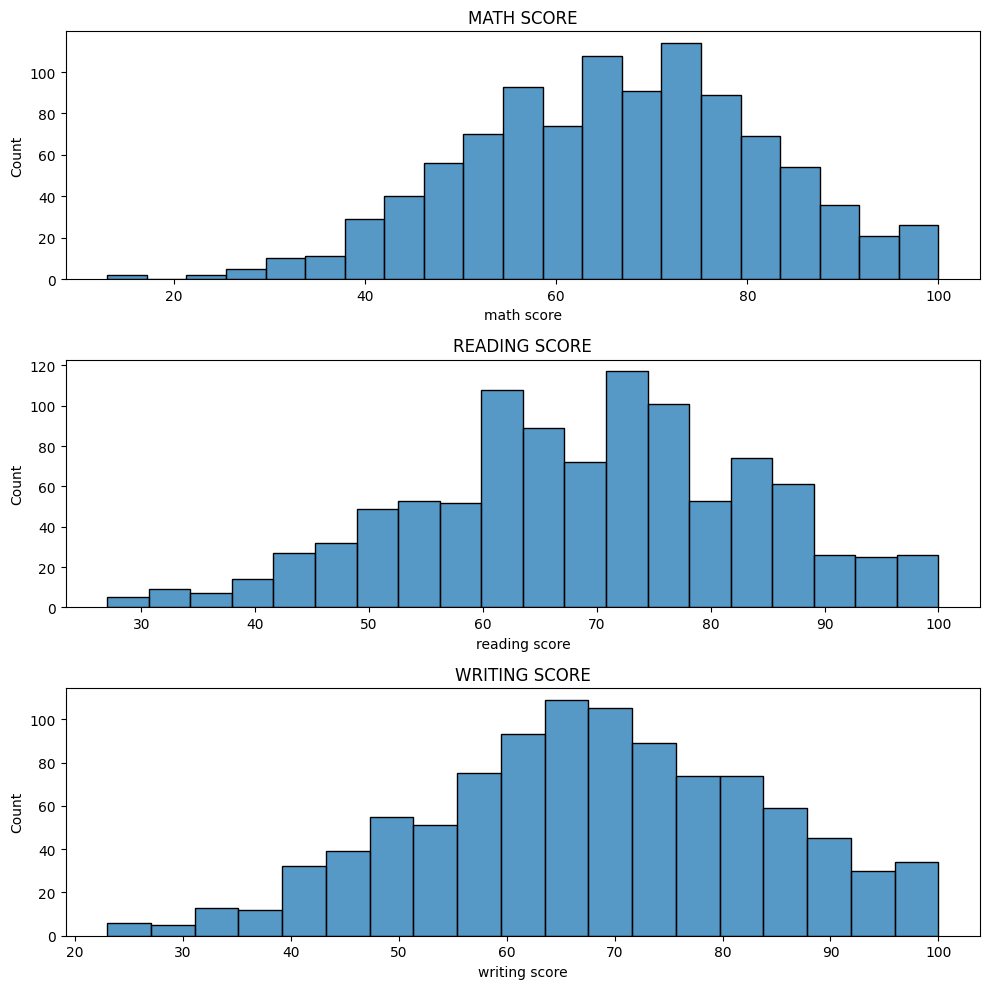

In [82]:
fix, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=1)

for i,col in enumerate(num_cols):
    sns.histplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

Находим корреляцию между баллами по предметам

In [83]:
data.corr()

math score  reading score  writing score
math score       1.000000       0.819398       0.805944
reading score    0.819398       1.000000       0.954274
writing score    0.805944       0.954274       1.000000

Рисуем графики распределения баллов по предметам в зависимости от всех свойств

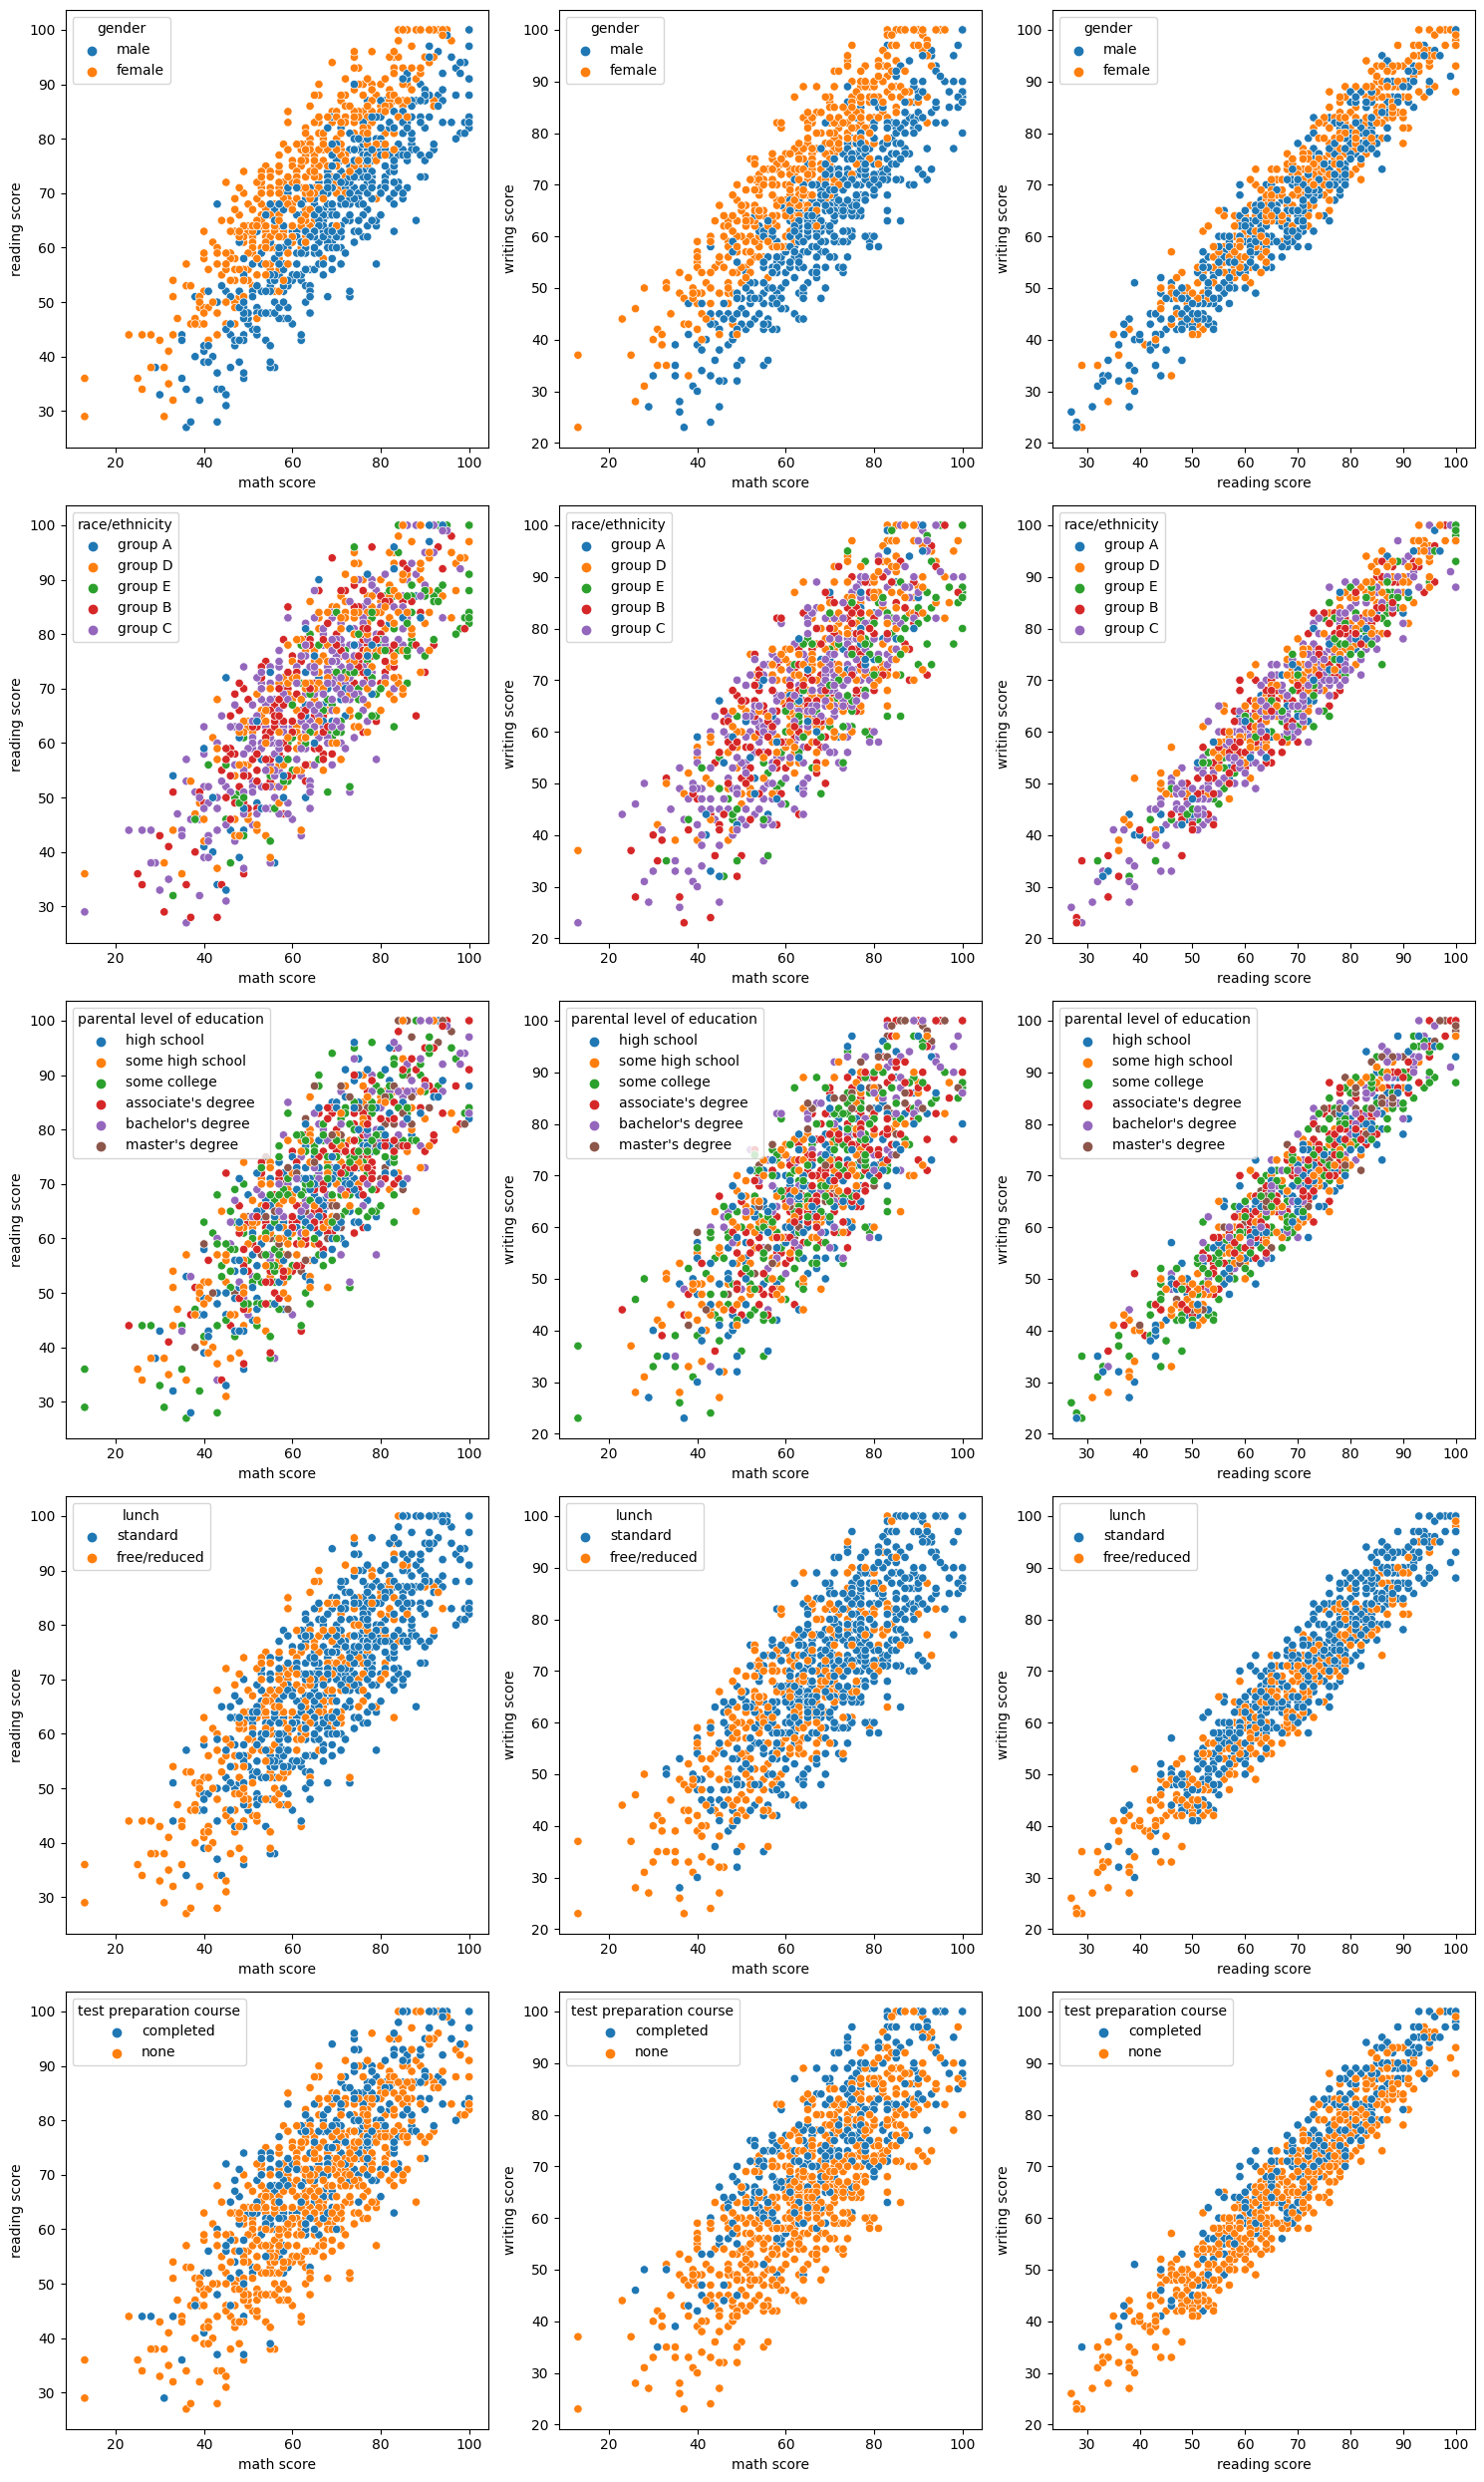

In [84]:
num_pairs = [[num_cols[0], num_cols[1]], 
         [num_cols[0], num_cols[2]], 
         [num_cols[1], num_cols[2]]]

fix, ax = plt.subplots(figsize=(15,25), nrows=5, ncols=3)

for i,p in enumerate(num_pairs):
    for j,hue in enumerate(cat_cols):
        sns.scatterplot(data=data, x=p[0], y=p[1], hue=hue, ax=ax[j,i])

plt.tight_layout()
plt.show()

Напишем 2 хелпер функции для описания результатов

In [85]:
def compare_groups(grouping_variable):
    printm(f'We are looking at the effect of **{grouping_variable.upper()}**.')
    print('\n\n')
    data.groupby(grouping_variable).mean().T.plot(kind='bar', figsize=(10,4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.grid()
    plt.title(grouping_variable.upper())
    plt.show()
    pairs = [pair for pair in data.groupby(grouping_variable)]
    values, groups = [pair[0] for pair in pairs], [pair[1] for pair in pairs]
    
    for course in num_cols:
        scores = [subdf[course] for subdf in groups]
        averages = [subdf[course].mean().round(2) for subdf in groups]
        printm(f'**COURSE:** {course.split()[0].upper()}')
        
        for val,avg in zip(values, averages):
            printm(f'Average for **{val}** is {avg}.')
            
        f_value, p_value = f_oneway(*scores) # if there are two groups, ANOVA is the same as t-test
        if p_value < 5:
            printm(f'There is a significant effect of _{grouping_variable}_.')
        else:
            print('There is no significant difference between groups.')
        printm('---')

In [86]:
def printm(x):
    display(Markdown(x))

Посмотрим на распределение баллов по гендеру

We are looking at the effect of **GENDER**.

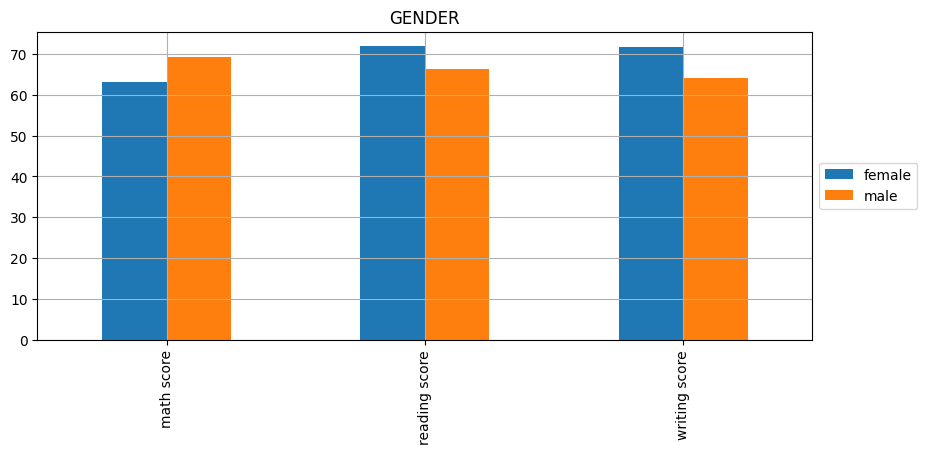

**COURSE:** MATH

Average for **female** is 63.2.

Average for **male** is 69.38.

There is a significant effect of _gender_.

---

**COURSE:** READING

Average for **female** is 71.89.

Average for **male** is 66.31.

There is a significant effect of _gender_.

---

**COURSE:** WRITING

Average for **female** is 71.71.

Average for **male** is 64.03.

There is a significant effect of _gender_.

---

In [87]:
compare_groups('gender')